# Tata Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Tata Cleaned Data.csv')

In [3]:
df.head(3)

,RowNumber,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity_cnv,InvoiceDate_cnv,UnitPrice_cnv
0,352240,577092,22195,LARGE HEART MEASURING SPOONS,12,2011-11-17 16:35:00,1.65,15136,United Kingdom,12,2011-11-17 16:35:00.000,1.65
1,352241,577092,22759,SET OF 3 NOTEBOOKS IN PARCEL,12,2011-11-17 16:35:00,1.65,15136,United Kingdom,12,2011-11-17 16:35:00.000,1.65
2,352242,577092,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,6,2011-11-17 16:35:00,2.95,15136,United Kingdom,6,2011-11-17 16:35:00.000,2.95


In [4]:
df.shape

(397924, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   RowNumber        397924 non-null  int64  
 1   InvoiceNo        397924 non-null  int64  
 2   StockCode        397924 non-null  object 
 3   Description      397924 non-null  object 
 4   Quantity         397924 non-null  int64  
 5   InvoiceDate      397924 non-null  object 
 6   UnitPrice        397924 non-null  float64
 7   CustomerID       397924 non-null  int64  
 8   Country          397924 non-null  object 
 9   Quantity_cnv     397924 non-null  int64  
 10  InvoiceDate_cnv  397924 non-null  object 
 11  UnitPrice_cnv    397924 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 36.4+ MB


####  Convert invoicedate column to datetime and customerid to string

In [6]:
# Convert invoicedate column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [7]:
# convert customerid to string
df['CustomerID'] = df['CustomerID'].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   RowNumber        397924 non-null  int64         
 1   InvoiceNo        397924 non-null  int64         
 2   StockCode        397924 non-null  object        
 3   Description      397924 non-null  object        
 4   Quantity         397924 non-null  int64         
 5   InvoiceDate      397924 non-null  datetime64[ns]
 6   UnitPrice        397924 non-null  float64       
 7   CustomerID       397924 non-null  object        
 8   Country          397924 non-null  object        
 9   Quantity_cnv     397924 non-null  int64         
 10  InvoiceDate_cnv  397924 non-null  object        
 11  UnitPrice_cnv    397924 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 36.4+ MB


#### Drop the three converted columns

In [9]:
drop_columns = ['Quantity_cnv', 'InvoiceDate_cnv', 'UnitPrice_cnv']
df.drop(columns = drop_columns, inplace=True)

In [10]:
df.head()

,RowNumber,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,352240,577092,22195,LARGE HEART MEASURING SPOONS,12,2011-11-17 16:35:00,1.65,15136,United Kingdom
1,352241,577092,22759,SET OF 3 NOTEBOOKS IN PARCEL,12,2011-11-17 16:35:00,1.65,15136,United Kingdom
2,352242,577092,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,6,2011-11-17 16:35:00,2.95,15136,United Kingdom
3,352243,577092,22865,HAND WARMER OWL DESIGN,12,2011-11-17 16:35:00,2.10,15136,United Kingdom
4,352244,577092,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-11-17 16:35:00,2.10,15136,United Kingdom


## CEO and CMO Questions and Answers

## Question 1

The CEO of the retail store is interested to view the time series of the revenue data for the year 2011 only. He would like to view granular data by looking into revenue for each month. The CEO is interested in viewing the seasonal trends and wants to dig deeper into why these trends occur. This analysis will be helpful for the CEO to forecast for the next year.

In [11]:
# Create revenue column using unitprice and quantity
df['Revenue'] = df['UnitPrice'] * df['Quantity']

In [12]:
df['Month'] = df['InvoiceDate'].dt.month

In [13]:
## Group the data by month and calculate the total revenue for each month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df_2011 = df[df['InvoiceDate'].dt.year == 2011]
monthly_revenue = df_2011.groupby(df_2011['InvoiceDate'].dt.month)['Revenue'].sum()
monthly_revenue

InvoiceDate
1      569445.040
2      447137.350
3      595500.760
4      469200.361
5      678594.560
6      661213.690
7      600091.011
8      645343.900
9      952838.382
10    1039318.790
11    1161817.380
12     518192.790
Name: Revenue, dtype: float64

In [14]:
# convert numerical month values to month names
import calendar

months = range(1, 13)  # Numeric month values from 1 to 12
month_names = [calendar.month_abbr[month] for month in months]  # Convert to month names

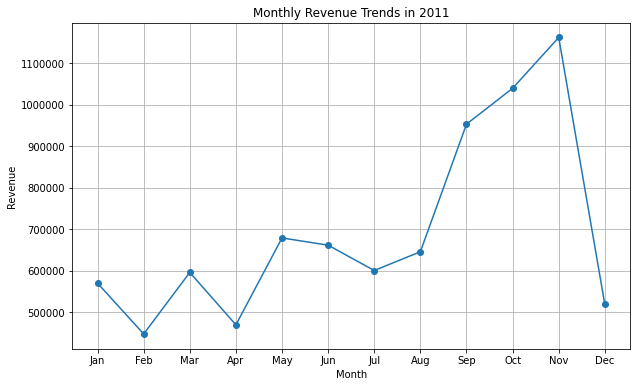

In [15]:
# plot monthly revenue trends in the year 2011
plt.figure(figsize=(10, 6))
plt.plot(month_names, monthly_revenue, marker='o', linestyle='-')
plt.title('Monthly Revenue Trends in 2011')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)

# Format y-axis labels without exponential notation
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

## Question 2

The CMO is interested in viewing the top 10 countries which are generating the highest revenue. Additionally, the CMO is also interested in viewing the quantity sold along with the revenue generated. The CMO does not want to have the United Kingdom in this visual.

In [16]:
# Remove any rows where the Country is "United Kingdom"
df_No_UK = df[df['Country'] != 'United Kingdom']
df_No_UK.head(3)

,RowNumber,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
365,352605,577121,21819,GLITTER CHRISTMAS STAR,36,2011-11-17 18:29:00,0.39,12681,France,14.04,11
366,352606,577121,23101,SILVER STARS TABLE DECORATION,24,2011-11-17 18:29:00,0.83,12681,France,19.92,11
367,352607,577121,35970,ZINC FOLKART SLEIGH BELLS,12,2011-11-17 18:29:00,1.69,12681,France,20.28,11


In [17]:
# Group by Country, calculate the total revenue and total quantity sold for each country
country_stats = df_No_UK.groupby('Country')[['Revenue', 'Quantity']].sum().reset_index()

# sort by revenue in descending order.
country_stats = country_stats.sort_values(by='Revenue', ascending=False)
country_stats.head()

,Country,Revenue,Quantity
23,Netherlands,285446.34,200937
10,EIRE,265545.90,140525
14,Germany,228867.14,119263
13,France,209024.05,111472
0,Australia,138521.31,84209


In [18]:
# Select the top 10 countries with the highest revenue.
top_10_countries = country_stats.head(10)

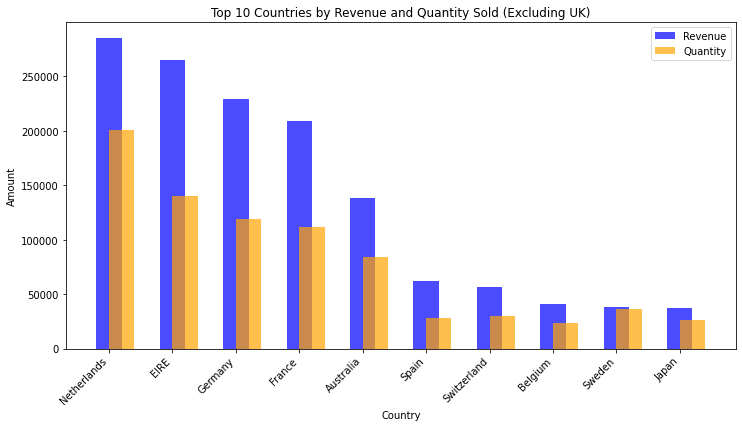

In [19]:
# bar chart to represent the top 10 countries and their corresponding revenue and quantity sold.

plt.figure(figsize=(12, 6))
plt.bar(top_10_countries['Country'], top_10_countries['Revenue'], label='Revenue', color='blue', alpha=0.7, width=0.4)
plt.bar(top_10_countries['Country'], top_10_countries['Quantity'], label='Quantity', color='orange', alpha=0.7, width=0.4, align='edge')
plt.xlabel('Country')
plt.ylabel('Amount')
plt.title('Top 10 Countries by Revenue and Quantity Sold (Excluding UK)')
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()

## Question 3

The CMO of the online retail store wants to view the information on the top 10 customers by revenue. He is interested in a visual that shows the greatest revenue generating customer at the start and gradually declines to the lower revenue generating customers. The CMO wants to target the higher revenue generating customers and ensure that they remain satisfied with their products.

In [20]:
# Group by customer and calculate the total revenue for each customer
customer_stats = df.groupby('CustomerID')['Revenue'].sum().reset_index()

# Sort by revenue in descending order
customer_stats = customer_stats.sort_values(by='Revenue', ascending=False)
customer_stats.head()

,CustomerID,Revenue
1690,14646,280206.02
4202,18102,259657.30
3729,17450,194550.79
3009,16446,168472.50
1880,14911,143825.06


In [21]:
# select the top 10 customers by revenue
top_10_customers = customer_stats.head(10)

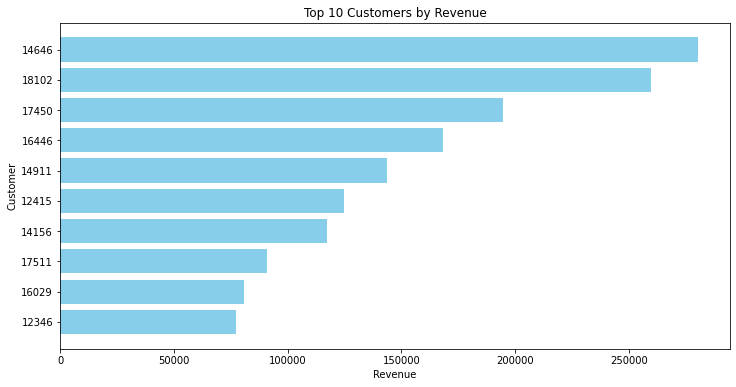

In [22]:
# plot the top 10 customers by revenue
plt.figure(figsize=(12, 6))
plt.barh(top_10_customers['CustomerID'], top_10_customers['Revenue'], color = 'skyblue')
plt.xlabel('Revenue')
plt.ylabel('Customer')
plt.title('Top 10 Customers by Revenue')
plt.gca().invert_yaxis()
plt.show()

## Question 4

The CEO is looking to gain insights on the demand for their products. He wants to look at all countries and see which regions have the greatest demand for their products. Once the CEO gets an idea of the regions that have high demand, he will initiate an expansion strategy which will allow the company to target these areas and generate more business from these regions. He wants to view the entire data on a single view without the need to scroll or hover over the data points to identify the demand. There is no need to show data for the United Kingdom as the CEO is more interested in viewing the countries that have expansion opportunities.

In [23]:
df_No_UK.head()

,RowNumber,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
365,352605,577121,21819,GLITTER CHRISTMAS STAR,36,2011-11-17 18:29:00,0.39,12681,France,14.04,11
366,352606,577121,23101,SILVER STARS TABLE DECORATION,24,2011-11-17 18:29:00,0.83,12681,France,19.92,11
367,352607,577121,35970,ZINC FOLKART SLEIGH BELLS,12,2011-11-17 18:29:00,1.69,12681,France,20.28,11
368,352608,577121,20668,DISCO BALL CHRISTMAS DECORATION,72,2011-11-17 18:29:00,0.12,12681,France,8.64,11
369,352609,577121,23084,RABBIT NIGHT LIGHT,96,2011-11-17 18:29:00,1.79,12681,France,171.84,11


In [24]:
# get the sum of quantity accross all countries except the UK
demands = df_No_UK.groupby('Country')['Quantity'].sum().reset_index()
demands.head()

,Country,Quantity
0,Australia,84209
1,Austria,4881
2,Bahrain,260
3,Belgium,23237
4,Brazil,356


In [25]:
#sort the quatity in descending order
demands = demands.sort_values(by = 'Quantity', ascending = False)
demands.head()

,Country,Quantity
23,Netherlands,200937
10,EIRE,140525
14,Germany,119263
13,France,111472
0,Australia,84209


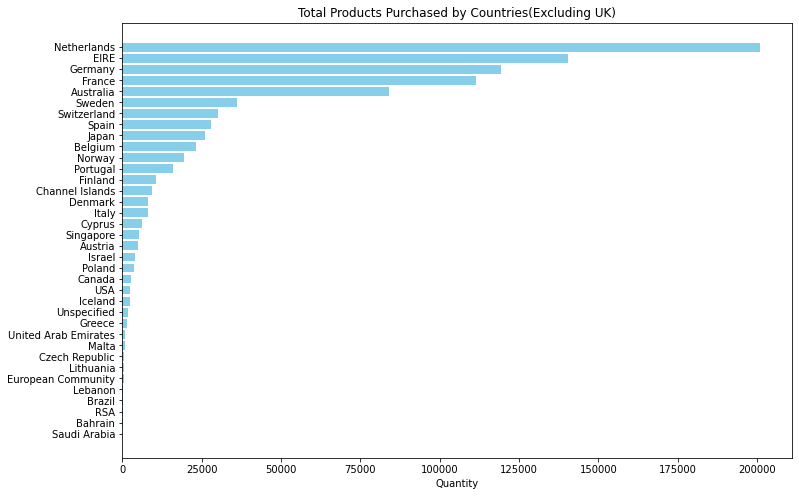

In [26]:
# plot products bought accross countries
plt.figure(figsize=(12, 8))
plt.barh(demands['Country'], demands['Quantity'], color = 'skyblue')
plt.xlabel('Quantity')
plt.title('Total Products Purchased by Countries(Excluding UK)')
plt.gca().invert_yaxis()
plt.show()